# Multivariate Gaussian distribution

*SG2227 Saleh Rezaeiravesh and Philipp Schlatter*

In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import math as mt
from scipy import special
from scipy import stats
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import norm

π = mt.pi

In [26]:
mean = [3,-1]
cov = np.array([[1, 1.5], 
                [1.5, 3]])
pts = np.random.multivariate_normal(mean, cov, size=300000)  # NOTE: here the variance is given, not std as in 1D!

In [27]:
pts.mean(axis=0)

array([ 2.99918002, -1.00104225])

In [28]:
np.cov(pts.T)

array([[0.99749931, 1.49518623],
       [1.49518623, 2.99431345]])

In [29]:
# marginal variances
np.var(pts[:,0]),np.var(pts[:,1])

(0.9974959822324021, 2.9943034696603212)

In [30]:
np.corrcoef(pts.T)[0,1]

0.8651479001901459

In [31]:
np.corrcoef(pts.T)[0,1]*np.sqrt(np.var(pts[:,0])*np.var(pts[:,1]))

1.4951812504413597

In [32]:
H, yedges, xedges = np.histogram2d(pts[:, 1], pts[:, 0], bins=[20,40], density=True) # (in bins the first one is y)
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2

<IPython.core.display.Javascript object>


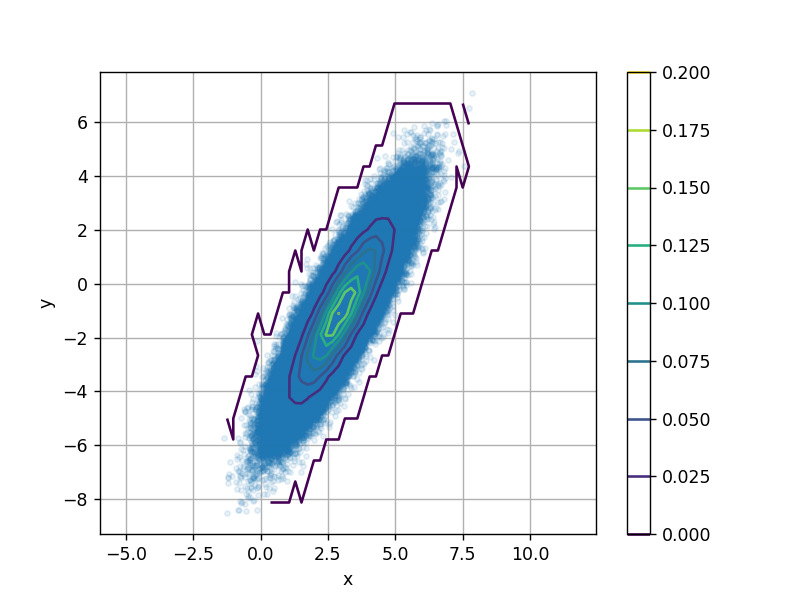

In [33]:
fig,ax1 = plt.subplots(1,1)
ax1.plot(pts[:, 0], pts[:, 1], '.', alpha=0.1)
h=ax1.contour(xcenters, ycenters, H)
ax1.axis('equal')
fig.colorbar(h)
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
fig.show()

The marginal distributions (i.e. when integrating in one direction) are exactly the same as the original distribution in that direction. This is a remarkable property of the multivariate normal distribution, which is useful for instance for Gaussian process regression.

<IPython.core.display.Javascript object>


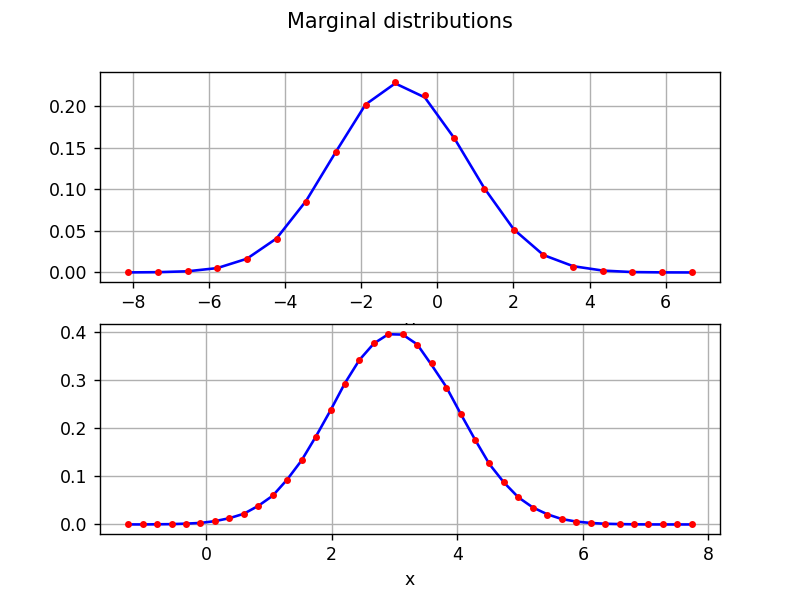

In [34]:
fig,(ax1,ax2) = plt.subplots(2,1)
fig.suptitle(r'Marginal distributions')
ax1.plot(ycenters,np.sum(H,1)*(xcenters[2]-xcenters[1]),'b')
ax1.plot(ycenters,norm.pdf(ycenters,mean[1],np.sqrt(cov[1,1])),'r.')
ax1.grid()
ax1.set_xlabel('y')

ax2.plot(xcenters,np.sum(H,0)*(ycenters[2]-ycenters[1]),'b')
ax2.plot(xcenters,norm.pdf(xcenters,mean[0],np.sqrt(cov[0,0])),'r.')
ax2.grid()
ax2.set_xlabel('x')
fig.show()